# Analytics and Visualisation: 



Create a bar chart showing the number of ratings for a movie. The time period granularity can range from the last seven days to the last seven months. The movie can either be selected from a drop-down menu or by entering the title in a text box.

Create a doughnut chart showing a breakup of the ratings given to a movie - how many 5 stars, 4 star, etc. The movie can either be selected from a drop-down menu or by entering the title in a text box  

Create a bar chart showing the number of five-star ratings for the top 10 movies (i.e. movies with the highest count of five-star ratings). We should be able to specify the date range from the last seven days to the last seven months.  
You can use any framework or dataset that you prefer. 

Submit the entire solution in a jupyter notebook and the details of the dataset used.   


Kaggle has many usable datasets, following is an example : https://www.kaggle.com/rounakbanik/the-movies-dataset?select=ratings.csv 

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
import datetime
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
py.offline.init_notebook_mode(connected=True)
from math import floor
from plotly import tools
from plotly.graph_objs import *
from IPython.display import display
import plotly.express as px
#from chart-studio import chart_studio.widgets

In [3]:
header = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv(r'C://Users//user//Downloads//ml-100k//u.data', sep='\t', names=header)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
items = pd.read_csv(r'C://Users//user//Downloads//ml-100k//u.item', header = None , sep = "|" , encoding='latin-1')
items.columns = ['movie id' , 'movie title' , 'release date' , 'video release date' ,
              'IMDb URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              'Childrens' , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film_Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci_Fi' ,
              'Thriller' , 'War' , 'Western']

In [6]:
items.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
movie_titles=items[['movie id', 'movie title' , 'release date']]

In [8]:
movie_titles.head()

,movie id,movie title,release date
0,1,Toy Story (1995),01-Jan-1995
1,2,GoldenEye (1995),01-Jan-1995
2,3,Four Rooms (1995),01-Jan-1995
3,4,Get Shorty (1995),01-Jan-1995
4,5,Copycat (1995),01-Jan-1995


In [9]:
merged_inner = pd.merge(left=df, right=movie_titles, left_on='item_id', right_on='movie id')

merged_inner.head()


,user_id,item_id,rating,timestamp,movie id,movie title,release date
0,196,242,3,881250949,242,Kolya (1996),24-Jan-1997
1,63,242,3,875747190,242,Kolya (1996),24-Jan-1997
2,226,242,5,883888671,242,Kolya (1996),24-Jan-1997
3,154,242,3,879138235,242,Kolya (1996),24-Jan-1997
4,306,242,5,876503793,242,Kolya (1996),24-Jan-1997


In [10]:
data_df=merged_inner[['user_id','movie id','rating','timestamp','movie title']]

In [11]:
data_df.head()

,user_id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [12]:
data_df['timestamp'] = pd.to_datetime(data_df['timestamp'],unit='s')

In [13]:
data_df['timestamp']=data_df['timestamp'].dt.normalize()

In [14]:
data_df.head()

,user_id,movie id,rating,timestamp,movie title
0,196,242,3,1997-12-04,Kolya (1996)
1,63,242,3,1997-10-01,Kolya (1996)
2,226,242,5,1998-01-04,Kolya (1996)
3,154,242,3,1997-11-10,Kolya (1996)
4,306,242,5,1997-10-10,Kolya (1996)


In [15]:
data_df.shape

(100000, 5)

In [16]:
new_data_df=data_df[0:10000]

In [17]:
new_data_df.head()

,user_id,movie id,rating,timestamp,movie title
0,196,242,3,1997-12-04,Kolya (1996)
1,63,242,3,1997-10-01,Kolya (1996)
2,226,242,5,1998-01-04,Kolya (1996)
3,154,242,3,1997-11-10,Kolya (1996)
4,306,242,5,1997-10-10,Kolya (1996)


In [18]:
new_data_df_1=new_data_df[['movie title','rating','timestamp']]

In [19]:
new_data_df_1.set_index('movie title')

,rating,timestamp
movie title,,
Kolya (1996),3,1997-12-04
Kolya (1996),3,1997-10-01
Kolya (1996),5,1998-01-04
Kolya (1996),3,1997-11-10
Kolya (1996),5,1997-10-10
...,...,...
Scream (1996),5,1997-12-20
Scream (1996),5,1997-12-28
Scream (1996),2,1998-02-03


In [20]:
movie_user = new_data_df.pivot_table(index='timestamp',columns='movie title',values='rating')
movie_user.head()

movie title,"Age of Innocence, The (1993)",Aladdin (1992),Angels and Insects (1995),Batman Forever (1995),Beautiful Thing (1996),"Boot, Das (1981)",Broken Arrow (1996),Casper (1995),Chasing Amy (1997),Conan the Barbarian (1981),...,Sleepless in Seattle (1993),"Sound of Music, The (1965)",Speechless (1994),Star Trek: First Contact (1996),"Sting, The (1973)",Tales from the Hood (1995),"To Wong Foo, Thanks for Everything! Julie Newmar (1995)",Toy Story (1995),"Trigger Effect, The (1996)",Twister (1996)
timestamp,,,,,,,,,,,,,,,,,,,,,
1997-09-20,3.0,4.5,NaN,3.0,NaN,5.0,3.333333,3.0,4.0,3.0,...,3.333333,4.000000,1.0,4.500000,4.500000,3.0,3.0,5.000000,NaN,3.000000
1997-09-21,NaN,3.5,NaN,2.0,NaN,4.0,3.500000,NaN,4.0,NaN,...,2.666667,5.000000,3.0,2.333333,4.000000,NaN,NaN,4.333333,NaN,2.800000
1997-09-22,NaN,NaN,4.0,NaN,NaN,5.0,2.500000,5.0,4.5,1.0,...,3.000000,3.333333,4.0,3.333333,NaN,3.0,4.0,4.500000,2.0,2.500000
1997-09-23,NaN,3.5,NaN,NaN,NaN,3.0,2.000000,NaN,4.0,NaN,...,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,5.000000,NaN,2.000000
1997-09-24,NaN,4.0,NaN,3.0,NaN,4.5,NaN,NaN,5.0,NaN,...,4.000000,3.250000,NaN,3.333333,3.333333,NaN,NaN,3.500000,3.0,2.666667


In [21]:
user_rating_over_time=movie_user.cumsum()
user_rating_over_time.head()

movie title,"Age of Innocence, The (1993)",Aladdin (1992),Angels and Insects (1995),Batman Forever (1995),Beautiful Thing (1996),"Boot, Das (1981)",Broken Arrow (1996),Casper (1995),Chasing Amy (1997),Conan the Barbarian (1981),...,Sleepless in Seattle (1993),"Sound of Music, The (1965)",Speechless (1994),Star Trek: First Contact (1996),"Sting, The (1973)",Tales from the Hood (1995),"To Wong Foo, Thanks for Everything! Julie Newmar (1995)",Toy Story (1995),"Trigger Effect, The (1996)",Twister (1996)
timestamp,,,,,,,,,,,,,,,,,,,,,
1997-09-20,3.0,4.5,NaN,3.0,NaN,5.0,3.333333,3.0,4.0,3.0,...,3.333333,4.000000,1.0,4.500000,4.500000,3.0,3.0,5.000000,NaN,3.000000
1997-09-21,NaN,8.0,NaN,5.0,NaN,9.0,6.833333,NaN,8.0,NaN,...,6.000000,9.000000,4.0,6.833333,8.500000,NaN,NaN,9.333333,NaN,5.800000
1997-09-22,NaN,NaN,4.0,NaN,NaN,14.0,9.333333,8.0,12.5,4.0,...,9.000000,12.333333,8.0,10.166667,NaN,6.0,7.0,13.833333,2.0,8.300000
1997-09-23,NaN,11.5,NaN,NaN,NaN,17.0,11.333333,NaN,16.5,NaN,...,NaN,NaN,NaN,12.166667,NaN,NaN,NaN,18.833333,NaN,10.300000
1997-09-24,NaN,15.5,NaN,8.0,NaN,21.5,NaN,NaN,21.5,NaN,...,13.000000,15.583333,NaN,15.500000,11.833333,NaN,NaN,22.333333,5.0,12.966667


# Create a bar chart showing the number of ratings for a movie. The time period granularity can range from the last seven days to the last seven months. The movie can either be selected from a drop-down menu or by entering the title in a text box. 

In [22]:
def multi_plot(df, title, addAll = True):
    fig = go.Figure()

    for column in df.columns.to_list():
        fig.add_trace(
            go.Bar(
                x = df.index,
                y = df[column],
                name = column
            )
        )

    button_all = dict(label = 'All',
                      method = 'update',
                      args = [{'visible': df.columns.isin(df.columns),
                               'title': 'All',
                               'showlegend':True}])

    def create_layout_button(column):
        return dict(label = column,
                    method = 'update',
                    args = [{'visible': df.columns.isin([column]),
                             'title': column,
                             'showlegend': True}])

    fig.update_layout(
        updatemenus=[go.layout.Updatemenu(
            active = 0,
            buttons = ([button_all] * addAll) + list(df.columns.map(lambda column: create_layout_button(column)))
            )
        ],
                
    )
    # Update remaining layout properties
    fig.update_layout(
        title_text=title,
        height=800
        
    )
   
    fig.show()

In [23]:
multi_plot(user_rating_over_time, title="Movie rating over time")

In [24]:
#create a dataframe for analysis
trend=pd.DataFrame(new_data_df.groupby('movie title')['rating'].mean())
trend['total number of ratings'] = pd.DataFrame(new_data_df.groupby('movie title')['rating'].count()) 
trend.head()

,rating,total number of ratings
movie title,,
"Age of Innocence, The (1993)",3.384615,65
Aladdin (1992),3.812785,219
Angels and Insects (1995),3.416667,72
Batman Forever (1995),2.666667,114
Beautiful Thing (1996),3.965517,29


# total number of ratings of movie 

In [25]:
data = [go.Bar(
   x = trend.index,
   y = trend['total number of ratings']
)]
fig = go.Figure(data=data)
iplot(fig)

# Create a doughnut chart showing a breakup of the ratings given to a movie - how many 5 stars, 4 star, etc. The movie can either be selected from a drop-down menu or by entering the title in a text box 

In [26]:
result1 = new_data_df.groupby(["movie id","movie title", "rating"])["rating"].count().reset_index(name="count")

In [27]:
result1.head(10)

,movie id,movie title,rating,count
0,1,Toy Story (1995),1,8
1,1,Toy Story (1995),2,27
2,1,Toy Story (1995),3,96
3,1,Toy Story (1995),4,202
4,1,Toy Story (1995),5,119
5,4,Get Shorty (1995),1,6
6,4,Get Shorty (1995),2,24
7,4,Get Shorty (1995),3,57
8,4,Get Shorty (1995),4,93
9,4,Get Shorty (1995),5,29


In [28]:
result1=result1[['movie title','rating','count']]

In [29]:
movie_ratings = result1.pivot_table(index='movie title',columns='rating',values='count')
movie_ratings.head()

rating,1,2,3,4,5
movie title,,,,,
"Age of Innocence, The (1993)",2.0,11.0,20.0,24.0,8.0
Aladdin (1992),2.0,15.0,58.0,91.0,53.0
Angels and Insects (1995),7.0,10.0,15.0,26.0,14.0
Batman Forever (1995),15.0,34.0,45.0,14.0,6.0
Beautiful Thing (1996),1.0,1.0,7.0,9.0,11.0


In [30]:
movie_ratings=movie_ratings.T

In [31]:
def multi_plot(df, title, addAll = True):
    fig = go.Figure()

    for column in df.columns.to_list():
        fig.add_trace(
            go.Pie(
                labels = df.index,
                values = df[column],
                hole=0.3
                
            )
        )

    button_all = dict(label = 'All',
                      method = 'update',
                      args = [{'visible': df.columns.isin(df.columns),
                               'title': 'All',
                               'showlegend':True}])

    def create_layout_button(column):
        return dict(label = column,
                    method = 'update',
                    args = [{'visible': df.columns.isin([column]),
                             'title': column,
                             'showlegend': True}])

    fig.update_layout(
        updatemenus=[go.layout.Updatemenu(
            active = 0,
            buttons = ([button_all] * addAll) + list(df.columns.map(lambda column: create_layout_button(column)))
            )
        ],
                
    )
    # Update remaining layout properties
    fig.update_layout(
        title_text=title,
        height=800
        
    )
   
    fig.show()



In [32]:
multi_plot(movie_ratings, title="Movie ratings")

# create a bar chart showing the number of five-star ratings for the top 10 movies (i.e. movies with the highest count of five-star ratings). We should be able to specify the date range from the last seven days to the last seven months.

In [33]:
new_data_df_top=data_df[['movie title','rating','timestamp']]
new_data_df_top.head()

,movie title,rating,timestamp
0,Kolya (1996),3,1997-12-04
1,Kolya (1996),3,1997-10-01
2,Kolya (1996),5,1998-01-04
3,Kolya (1996),3,1997-11-10
4,Kolya (1996),5,1997-10-10


In [34]:
new_data_df_top=new_data_df.groupby(["movie title", "rating","timestamp"])["timestamp"].count().reset_index(name="count")
new_data_df_top.head()

,movie title,rating,timestamp,count
0,"Age of Innocence, The (1993)",1,1998-01-23,1
1,"Age of Innocence, The (1993)",1,1998-04-02,1
2,"Age of Innocence, The (1993)",2,1997-11-12,1
3,"Age of Innocence, The (1993)",2,1997-11-14,2
4,"Age of Innocence, The (1993)",2,1997-11-19,1


In [35]:
new_data_df_top=new_data_df_top.loc[new_data_df_top['rating']==5]
new_data_df_top.head(10)

,movie title,rating,timestamp,count
50,"Age of Innocence, The (1993)",5,1997-10-15,1
51,"Age of Innocence, The (1993)",5,1997-11-11,1
52,"Age of Innocence, The (1993)",5,1997-11-13,1
53,"Age of Innocence, The (1993)",5,1997-11-14,2
54,"Age of Innocence, The (1993)",5,1997-12-17,1
55,"Age of Innocence, The (1993)",5,1998-03-31,1
56,"Age of Innocence, The (1993)",5,1998-04-04,1
187,Aladdin (1992),5,1997-09-20,2
188,Aladdin (1992),5,1997-09-21,1
189,Aladdin (1992),5,1997-09-25,1


In [36]:
new_data_df_top_5=new_data_df_top.groupby(
   ['movie title']
).agg(
    {
         'count':sum,    # Sum 
         'timestamp': 'first'  # get the first date per group
    }
)

final_df=new_data_df_top_5.sort_values(by=['count'],ascending=False)
final_df.head(10)

,count,timestamp
movie title,,
Fargo (1996),227,1997-09-20
"Silence of the Lambs, The (1991)",181,1997-09-20
Return of the Jedi (1983),171,1997-09-20
L.A. Confidential (1997),120,1997-09-28
Toy Story (1995),119,1997-09-20
Rear Window (1954),107,1997-09-20
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),95,1997-09-21
E.T. the Extra-Terrestrial (1982),93,1997-09-20
"Boot, Das (1981)",88,1997-09-20


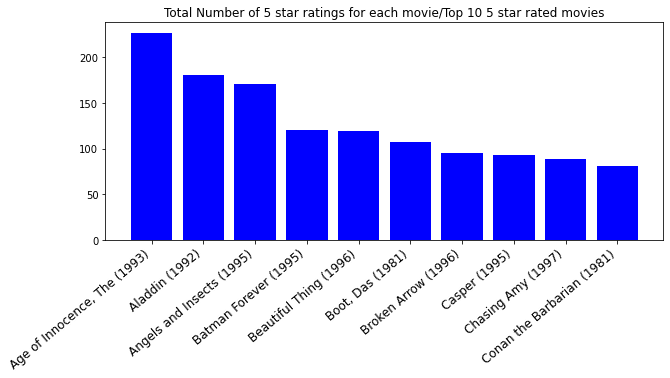

In [39]:
plt.figure(figsize =(10, 4))
ax=plt.subplot()
ax.bar(final_df.head(10).index,final_df['count'].head(10),color='b')
ax.set_xticklabels(trend.index,rotation=40,fontsize='12',horizontalalignment="right")
ax.set_title("Total Number of 5 star ratings for each movie/Top 10 5 star rated movies")
plt.show()

In [40]:

    
new_data_df_2=new_data_df_1.loc[new_data_df_1['rating']==5]
new_data_df_2.head(10)

,movie title,rating,timestamp
2,Kolya (1996),5,1998-01-04
4,Kolya (1996),5,1997-10-10
6,Kolya (1996),5,1998-02-27
11,Kolya (1996),5,1998-03-29
12,Kolya (1996),5,1998-01-02
14,Kolya (1996),5,1998-03-13
15,Kolya (1996),5,1997-10-22
23,Kolya (1996),5,1997-12-23
25,Kolya (1996),5,1998-04-12
26,Kolya (1996),5,1997-09-26


In [41]:
new_data_df_top['timestamp'].max()

Timestamp('1998-04-22 00:00:00')

In [42]:
new_data_df_2=new_data_df_2[new_data_df_2.rating == 5].groupby(['movie title', 'timestamp']).count()



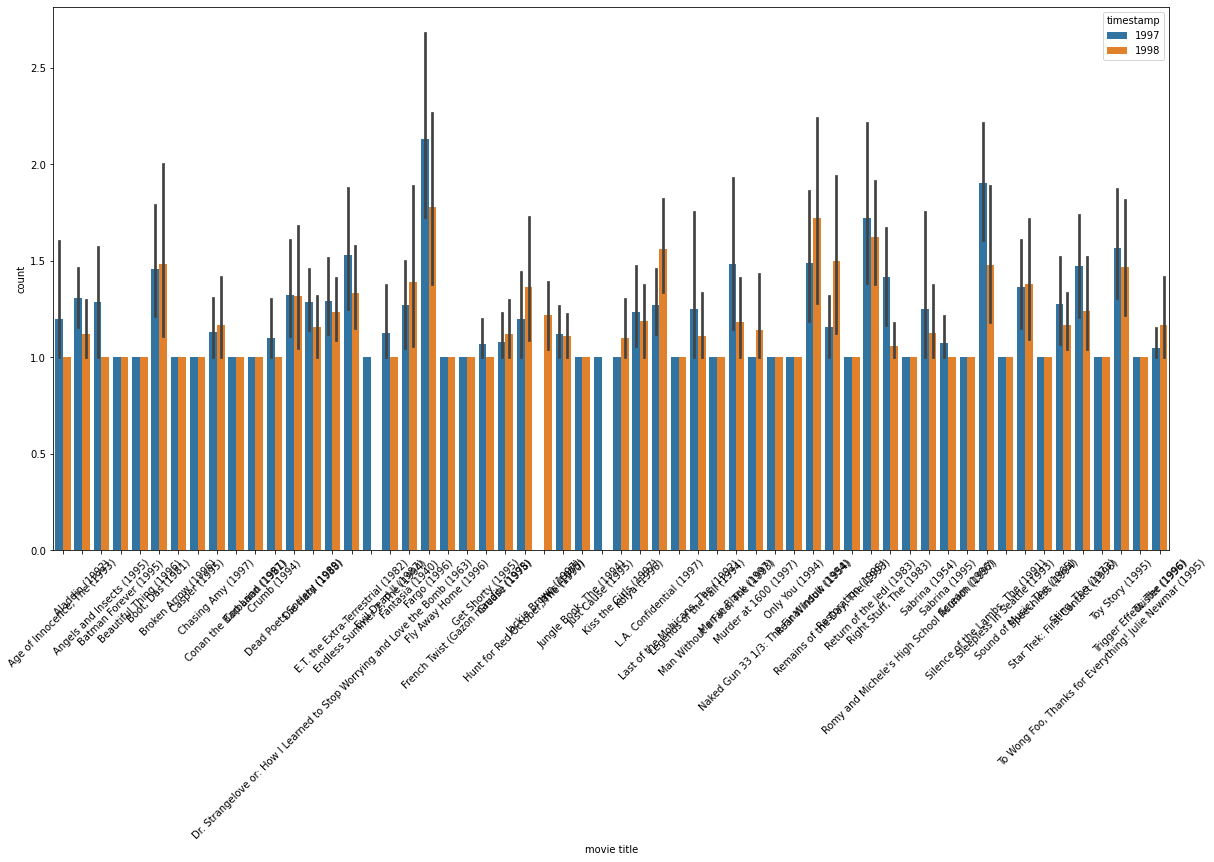

In [48]:
plt.figure(figsize =(20, 10))
sns.barplot(x=new_data_df_top['movie title'],y=new_data_df_top['count'],data=new_data_df_top,hue=new_data_df_top['timestamp'].dt.year)
plt.xticks(rotation=45)
plt.show()